Do `Kernel -> Restart & Run All` in top menu to run the notebook and enable the interactive widgets

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from IPython.display import display
from ipywidgets import widgets

In [3]:
def set_stem_plot(handle, x, y):
    ml, sl, _ = handle
    ml.set_data(x, y)
    for i_l, l in enumerate(sl):
        l.set_data(np.stack((x,x)).T[i_l], 
                   np.stack((np.zeros(x.shape), y)).T[i_l])

<IPython.core.display.Javascript object>


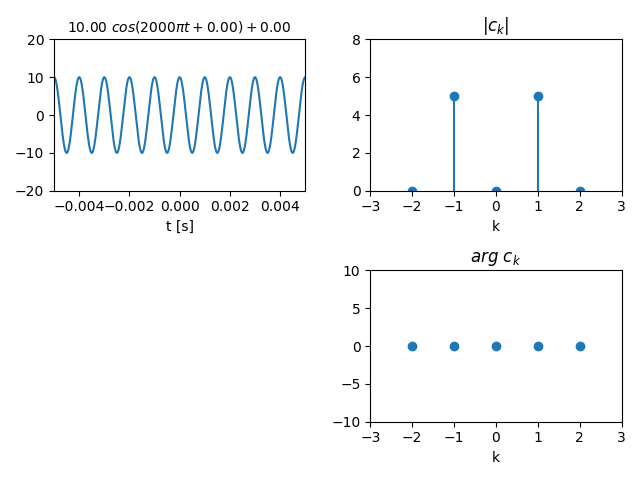

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.plot_cos_spectrum>

In [4]:
t_axis = np.linspace(-0.005,0.005,1000)
k_lim = 2
k_axis = np.arange(-k_lim,k_lim+1)

# cosine frequency
f = 1000

# setting up the plots
fig, ax = plt.subplots(2,2)
ax[0,0].set_xlim([-0.005,0.005])
ax[0,0].set_ylim([-20,20])
ax[0,0].set_xlabel('t [s]')
ax[0,1].set_xlim([-k_lim-1,k_lim+1])
ax[0,1].set_ylim([0,8])
ax[0,1].set_xlabel('k')
ax[0,1].set_title('$|c_k|$')
ax[1,1].set_xlabel('k')
ax[1,1].set_title('$arg\ c_k$')
ax[1,1].set_xlim([-k_lim-1,k_lim+1])
ax[1,1].set_ylim([-10,10])
ax[1,0].axis('off')
spec_zeros = np.zeros(k_axis.shape)
sig_plot, = ax[0,0].plot(t_axis,t_axis)
magspec_plot = ax[0,1].stem(k_axis, spec_zeros, basefmt = ' ')
argspec_plot = ax[1,1].stem(k_axis, spec_zeros, basefmt = ' ')
plt.tight_layout()

# wrapper for interactive mode
def plot_cos_spectrum(a = 10, ph = 0, k = 0):
    # cosine in time
    cos_t = a * np.cos(2 * pi * f * t_axis + ph) + k
    # magnitude spectrum
    mag_spec = np.zeros(k_axis.shape)
    arg_spec = np.zeros(k_axis.shape)
    mag_spec[k_lim+1] = a / 2
    mag_spec[k_lim-1] = a / 2
    mag_spec[k_lim] = np.abs(k)
    # argument of spectrum
    arg_spec[k_lim+1] = ph
    arg_spec[k_lim-1] = -ph
    arg_spec[k_lim] = 0 if k >= 0 else pi
    # updating the plots
    ax[0,0].set_title(f'${a:.2f}\ cos(2000\pi t{ph:+.2f}){k:+.2f}$', fontsize=10)
    sig_plot.set_data(t_axis, cos_t)
    set_stem_plot(magspec_plot, k_axis, mag_spec)
    set_stem_plot(argspec_plot, k_axis, arg_spec)
    plt.draw()
    
widgets.interact(plot_cos_spectrum, 
                 a = (0.1,15,0.1), 
                 ph = (-8.0,8.0,0.2), 
                 k = (-8,8,0.2))